# Flight Data Exploration
## by Kevin Wu

## Preliminary Wrangling

This document explores a dataset containing flight attributes for almost 2,389,217 flights in 2008. To reduce runtime, only the month of January was analyzed, which has 605,765 entries.

In [1]:
# Import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
# Read 2008 flight data

df=pd.read_csv('2008.csv')

In [3]:
# Query only data for January to reduce runtime

df=df[df.Month == 1]

In [4]:
print(df.shape)
print(df.dtypes)

(605765, 29)
Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object


In [5]:
df.sample(10)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
541787,2008,1,20,7,738.0,740,1120.0,1139,AS,728,...,4.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
438953,2008,1,11,5,1810.0,1702,1930.0,1828,NW,835,...,7.0,20.0,0,NaN,0,62.0,0.0,0.0,0.0,0.0
178592,2008,1,6,7,1537.0,1320,1741.0,1458,OO,6000,...,42.0,20.0,0,NaN,0,0.0,0.0,163.0,0.0,0.0
39939,2008,1,15,2,1047.0,1050,1206.0,1210,WN,1247,...,5.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
94987,2008,1,22,2,1611.0,1610,1708.0,1707,XE,148,...,4.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
512809,2008,1,1,2,555.0,600,826.0,835,AA,1614,...,7.0,11.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
158170,2008,1,13,7,1057.0,1100,1120.0,1130,OH,5365,...,8.0,11.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
559260,2008,1,25,5,2327.0,2335,449.0,512,B6,490,...,3.0,14.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
166341,2008,1,27,7,1157.0,1207,1320.0,1339,OH,5059,...,11.0,20.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
229494,2008,1,19,6,1406.0,1252,1502.0,1345,UA,394,...,4.0,22.0,0,NaN,0,74.0,0.0,3.0,0.0,0.0


In [6]:
df.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,605765.0,605765.0,605765.000000,605765.000000,588457.000000,605765.000000,587130.000000,605765.000000,605765.000000,587130.000000,...,605765.000000,587130.000000,588457.000000,605765.000000,605765.000000,148807.000000,148807.000000,148807.000000,148807.000000,148807.000000
mean,2008.0,1.0,15.908885,3.848879,1341.313469,1330.337020,1491.156790,1499.829660,2229.870511,128.296963,...,720.257461,6.888546,16.797139,0.028572,0.002191,15.832279,2.888493,16.277326,0.086770,21.140054
std,0.0,0.0,8.994594,1.923451,477.113017,463.361168,502.776793,480.073842,1959.893778,70.263954,...,557.607215,5.014824,10.969598,0.166601,0.046753,39.000363,19.491878,31.697242,1.603085,38.808331
min,2008.0,1.0,1.000000,1.000000,1.000000,10.000000,1.000000,1.000000,1.000000,15.000000,...,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2008.0,1.0,8.000000,2.000000,933.000000,930.000000,1116.000000,1120.000000,614.000000,77.000000,...,321.000000,4.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2008.0,1.0,16.000000,4.000000,1333.000000,1325.000000,1520.000000,1522.000000,1551.000000,111.000000,...,576.000000,6.000000,14.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000
75%,2008.0,1.0,24.000000,5.000000,1731.000000,1719.000000,1914.000000,1910.000000,3669.000000,159.000000,...,951.000000,8.000000,20.000000,0.000000,0.000000,17.000000,0.000000,20.000000,0.000000,27.000000
max,2008.0,1.0,31.000000,7.000000,2400.000000,2359.000000,2400.000000,2400.000000,9202.000000,693.000000,...,4962.000000,213.000000,383.000000,1.000000,1.000000,1158.000000,1049.000000,1357.000000,136.000000,897.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 605765 entries, 0 to 605764
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Year               605765 non-null  int64  
 1   Month              605765 non-null  int64  
 2   DayofMonth         605765 non-null  int64  
 3   DayOfWeek          605765 non-null  int64  
 4   DepTime            588457 non-null  float64
 5   CRSDepTime         605765 non-null  int64  
 6   ArrTime            587130 non-null  float64
 7   CRSArrTime         605765 non-null  int64  
 8   UniqueCarrier      605765 non-null  object 
 9   FlightNum          605765 non-null  int64  
 10  TailNum            595813 non-null  object 
 11  ActualElapsedTime  587130 non-null  float64
 12  CRSElapsedTime     605659 non-null  float64
 13  AirTime            587130 non-null  float64
 14  ArrDelay           587130 non-null  float64
 15  DepDelay           588457 non-null  float64
 16  Or

In [8]:
df[df.Cancelled==1].sample(10)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
420015,2008,1,14,1,NaN,705,NaN,820,MQ,4788,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
205407,2008,1,23,3,NaN,1048,NaN,1208,OO,6350,...,NaN,NaN,1,C,0,NaN,NaN,NaN,NaN,NaN
340396,2008,1,18,5,NaN,625,NaN,746,EV,4723,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
126995,2008,1,22,2,NaN,1500,NaN,1630,XE,2987,...,NaN,NaN,1,C,0,NaN,NaN,NaN,NaN,NaN
405877,2008,1,29,2,NaN,1820,NaN,1940,MQ,4134,...,NaN,NaN,1,C,0,NaN,NaN,NaN,NaN,NaN
393292,2008,1,27,7,NaN,1255,NaN,1415,MQ,3636,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
405942,2008,1,1,2,NaN,1420,NaN,1735,MQ,4138,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
399910,2008,1,1,2,NaN,1555,NaN,1750,MQ,3921,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
214527,2008,1,29,2,NaN,2130,NaN,2226,OO,5939,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
522389,2008,1,3,4,NaN,1320,NaN,1500,AA,2023,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN


In [9]:
df.TailNum.value_counts()

N484HA    398
N480HA    391
N835AL    388
N836AL    383
N487HA    379
         ... 
N184DN      1
N7BTAA      1
N171DN      1
N217UA      1
N799UA      1
Name: TailNum, Length: 4878, dtype: int64

### What is the structure of your dataset?

The dataset has 605,765 entries with 29 attributes. There is a mix of datatypes. For instance, there are categorical data (e.g. Cancelled in boolean), numerical data (e.g. Distance), and datetime data (e.g. Departure Time).

### What is/are the main feature(s) of interest in your dataset?

I am interested in investigating which attributes best predict flight cancellations.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Since a lot of the attributes are marked as NaN for cancelled flights, predictive attributes are limited to the attributes with data. 

From the attributes with data, I expect the following to have an impact (listed from what I think would have the highest correlation):
1. Carrier
2. Certain Planes (TailNum)
3. Certain Locations (Origin and Destinations)
4. Departure Time
5. Distance
6. Day of the Week

## Univariate Exploration


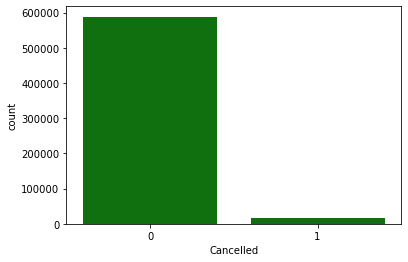

In [10]:
#Flights cancelled

sb.countplot(df.Cancelled, color='green');

**Comments:** It is clear that there is a very small percent of flights that are cancelled.

**Next:** To look at only cancelled flights, a DataFrame named df2 will be created to analyze later on. Flight cancellations codes will also be plotted by count to see if we can determine any trends from it.

In [11]:
# Query cancelled flights only as df2

df2=df[df.Cancelled==1]

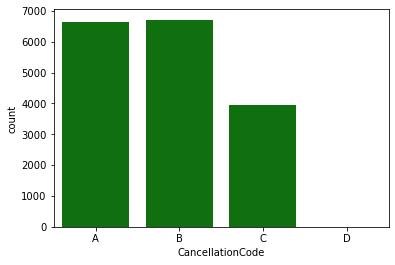

In [12]:
#Flight cancellation code count

order1= ['A', 'B', 'C', 'D']
sb.countplot(df.CancellationCode, color='green', order=order1);

**Comments:** It appears that most cancellations are due to carrier reasons (A), weather (B), and NAS (C), which is an umbrella category for cancellations that could have been addressed by the National Aviation System. 

This appears to confirm that certain origins/destinations and carriers/planes might have higher cancellations due to propensity for certain weather conditions and carrier/plane quality.

**Next:** I will look at quantity of flights per carrier, origins, and destinations for all flights and cancelled flights.

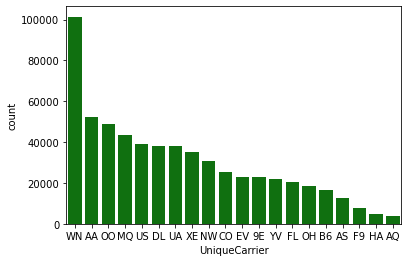

In [13]:
#Flight carrier count (all flights)

order2=df.UniqueCarrier.value_counts().nlargest(20).index
sb.countplot(data=df,x='UniqueCarrier', color='green', order=order2);

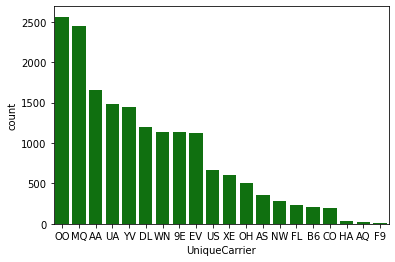

In [14]:
#Flight carrier count (cancelled flights)

order2=df2.UniqueCarrier.value_counts().nlargest(20).index
sb.countplot(data=df2,x='UniqueCarrier', color='green', order=order2);

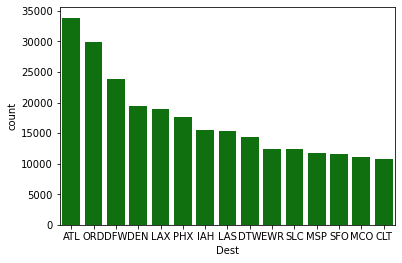

In [15]:
#Flight destination count (all flights)

order3=df.Dest.value_counts().nlargest(15).index
sb.countplot(data=df, x='Dest', color='green', order=order3);

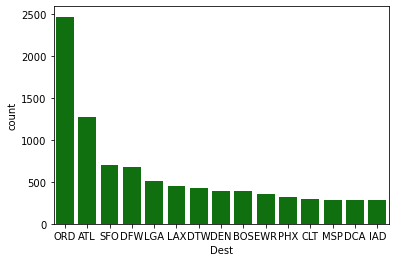

In [16]:
#Flight destination count (cancelled)

order3=df2.Dest.value_counts().nlargest(15).index
sb.countplot(data=df2, x='Dest', color='green', order=order3);

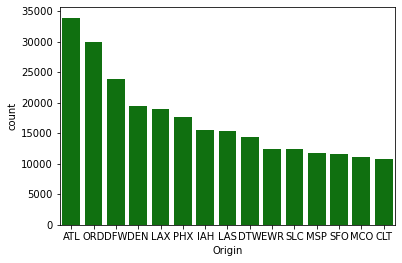

In [17]:
#Flight origin count (all flights)

order4=df.Origin.value_counts().nlargest(15).index
sb.countplot(data=df, x='Origin', color='green', order=order4);

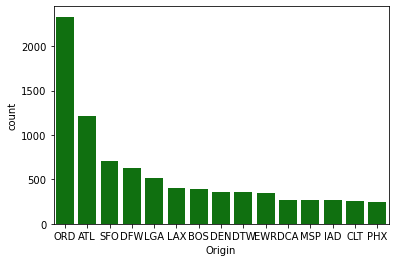

In [18]:
#Flight origin count (cancelled)

order4=df2.Origin.value_counts().nlargest(15).index
sb.countplot(data=df2, x='Origin', color='green', order=order4);

**Comments:**  For the features shown above for carriers and location, the distribution does not appear unusual as these are categorical. Towards the larger ends, some of the carriers/locations have more flights due to increased market share than the next highest carriers/locations, but this is expected.

If you look at the all flight vs cancelled graphs, you can tell some locations/carriers have a bias towards cancellation. This is more of a bivariate exploration, though, and will be noted later in this report.
    
**Next:** I will look at flights per plane to see if there are unusual distribution behaviors.

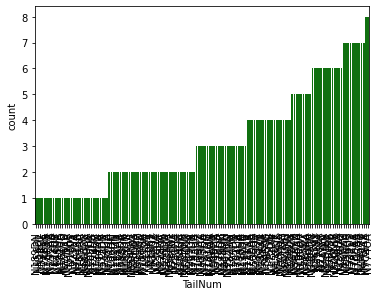

In [19]:
#Planes with lowest flight counts

order5=df.TailNum.value_counts().nsmallest(150).index
sb.countplot(data=df, x='TailNum', color='green', order=order5);
plt.xticks(rotation=90);

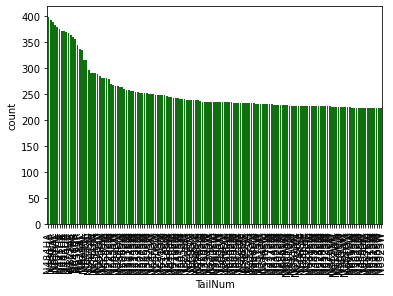

In [20]:
#Planes with highest flight counts

order5=df.TailNum.value_counts().nlargest(150).index
sb.countplot(data=df, x='TailNum', color='green', order=order5);
plt.xticks(rotation=90);

**Comments:** Due to runtime, I have only run the planes with the lowest and highest counts. It appears that the distribution gradually varies between 1 to 400. It is unclear how this might reflect on cancelled flights. It is possible smaller planes are more defective, for instance.

**Next:** I will be looking at flight counts according to distance, departure time, and day of the week.

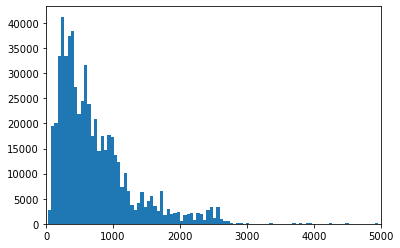

In [21]:
#Flight distance count by bins (all flights)

plt.hist(data=df,x='Distance',bins=100);
plt.xlim(0,5000);

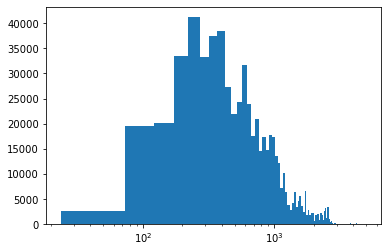

In [22]:
#Transformed to logscale

plt.hist(data=df,x='Distance',bins=100);
plt.xscale('log');

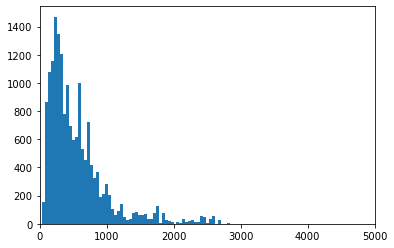

In [23]:
#Flight distance count by bins (cancelled flights)

plt.hist(data=df2,x='Distance',bins=100);
plt.xlim(0,5000);

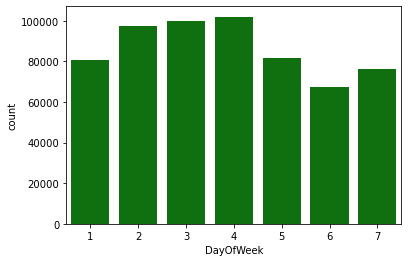

In [24]:
#Flight day of the week count. (all flights)

sb.countplot(data = df, x = 'DayOfWeek', color = 'green');

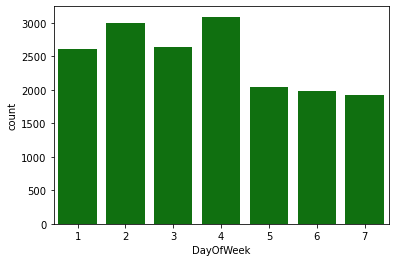

In [25]:
#Flight day of the week count. (cancelled flights)

sb.countplot(data = df2, x = 'DayOfWeek', color = 'green');

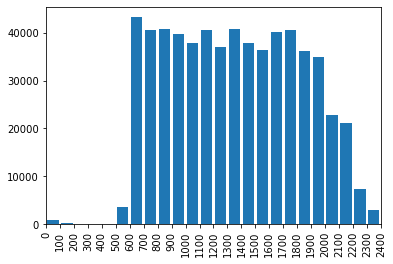

In [26]:
#Flight schedule departure time count by the hour. (all flights)

ticks1=[0,100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000,2100,2200,2300,2400]
bins1=[0,100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000,2100,2200,2300,2400]
plt.hist(data=df,x='CRSDepTime',bins=bins1, rwidth=8/10);
plt.xlim(0,2400);
plt.xticks(ticks1,ticks1);
plt.xticks(rotation=90);

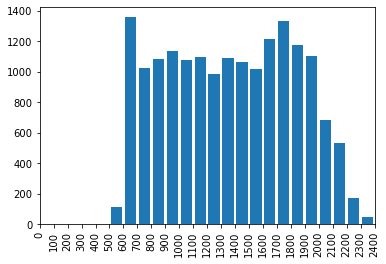

In [27]:
#Flight schedule departure time count by the hour. (cancelled flights)

ticks1=[0,100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000,2100,2200,2300,2400]
bins1=[0,100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000,2100,2200,2300,2400]
plt.hist(data=df2,x='CRSDepTime',bins=bins1, rwidth=8/10);
plt.xlim(0,2400);
plt.xticks(ticks1,ticks1);
plt.xticks(rotation=90);

**Comments:** For all flights, it appears that the distribution for distance skews right. This means that there are few flights with big distances. When plotted with a log transform, the graph appears slightly bimodal but still conveys the same information. For cancelled flights, the cancelled flights have a distance less than 3000 mi generally. 

Flights appear to be mostly well distributed between days of the week for both all flights and for cancelled flights. Similarly, flights appear to be mostly well distributed between hours 6 and 21. The rest of the time flights are minimal or non-existent (from 2 to 5am). At a glance, the difference between 'all flight' and 'cancelled' graphs indicate there is a pattern there to be analyzed via bivariate exploration.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

My value of interest is cancellations, which is marked either 0 or 1 to determine how many flights are cancelled. This data appears to be clean as only 0 and 1 have been inputted. It is clear that cancellations make up a small percent of all flights. No transformations were performed.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The distribution for the departure times were unusual, but this was due to human scheduling of flights leading to less overnight flights. The flight distance distribution was a bit unusual due to it spiking, but not unexpected.

I created a df2 table for only cancelled flights, which is what we are trying to predict. I also set the distance count to log scale to see if any other insights were visible, but nothing new was noted.


## Bivariate Exploration

I will start by looking at joined cancelled vs not cancelled clustered bars for features above starting with carriers.

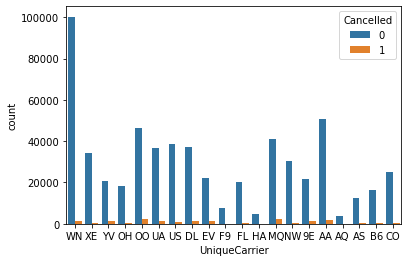

In [38]:
#Clustered bar chart for cancelled and non-cancelled flights per carrier

sb.countplot(data = df, x = 'UniqueCarrier', hue = 'Cancelled');

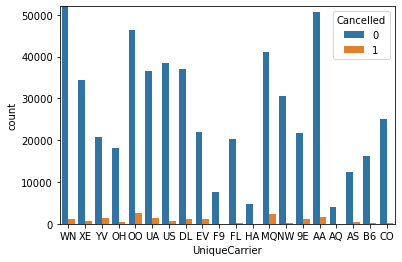

In [39]:
#Y axis range limited to observe cancelled bars.

sb.countplot(data = df, x = 'UniqueCarrier', hue = 'Cancelled');
plt.ylim(0,52000);

In [41]:
#Feature engineering new cancellation proportion table for Carrier.

df3=pd.DataFrame(df2.groupby('UniqueCarrier').Cancelled.count())
df3['all_flights']=pd.DataFrame(df.groupby('UniqueCarrier').Cancelled.count())
df3['cancelled_prop']=df3['Cancelled']*100/df3['all_flights']
df3=df3.sort_values('cancelled_prop', ascending=False)
df3=df3.reset_index()

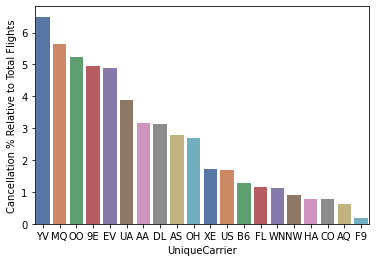

In [40]:
#Barplot cancellation %s per Unique Carrier.

sb.barplot(data=df3, x='UniqueCarrier', y='cancelled_prop', palette='deep');
plt.ylabel('Cancellation % Relative to Total Flights');

**Comments:** Based on the graph above, some carriers have a higher percentage of cancelled flights. WN, for example, has a low percentage of cancelled flights considering it has so many total flights. This was clarified by feature engineering a column of cancelled flights per carrier. In this graph, it is clear that airlines such as YV, MQ, OO, 93, and EV have much higher cancellation rates relative to WN and AA.

**Next:** I will be looking at creating proportion bars for the destination and origin flights.

In [53]:
#Feature engineering new destination proportion table for Destination.
df4=pd.DataFrame(df2.groupby('Dest').Cancelled.count())
df4['all_flights']=pd.DataFrame(df.groupby('Dest').Cancelled.count())
df4['cancelled_prop']=df4['Cancelled']*100/df4['all_flights']
df4=df4.sort_values('cancelled_prop', ascending=False).head(20)
df4=df4.reset_index()

,Dest,Cancelled,all_flights,cancelled_prop
0,PLN,10,25,40.000000
1,TEX,14,54,25.925926
2,ALO,7,27,25.925926
3,CMX,8,31,25.806452
4,CWA,23,120,19.166667
5,SUN,41,217,18.894009
6,SUX,6,37,16.216216
7,RHI,5,31,16.129032
8,AZO,57,359,15.877437
9,LSE,23,161,14.285714


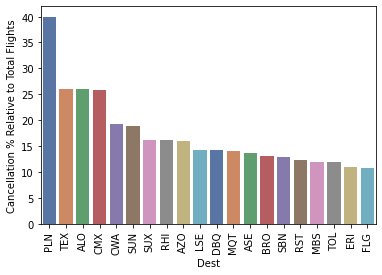

In [56]:
#Barplot cancellation %s per Destination.
sb.barplot(data=df4, x='Dest', y='cancelled_prop', palette='deep');
plt.ylabel('Cancellation % Relative to Total Flights');
plt.xticks(rotation=90);

In [71]:
#Feature engineering new destination proportion table for Origin.

df5=pd.DataFrame(df2.groupby('Origin').Cancelled.count())
df5['all_flights']=pd.DataFrame(df.groupby('Origin').Cancelled.count())
df5['cancelled_prop']=df5['Cancelled']*100/df5['all_flights']
df6=df5.sort_values('cancelled_prop', ascending=False).head(30)
df6=df6.reset_index()

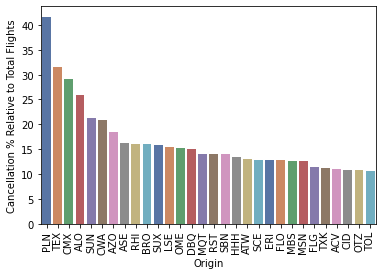

In [72]:
#Barplot cancellation %s per Origin ordered from top 30.
sb.barplot(data=df6, x='Origin', y='cancelled_prop', palette='deep');
plt.ylabel('Cancellation % Relative to Total Flights');
plt.xticks(rotation=90);

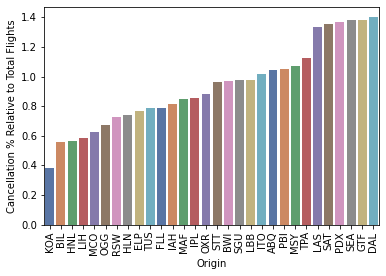

In [74]:
#Barplot cancellation %s per Origin ordered from lowest 30.

df7=df5.sort_values('cancelled_prop', ascending=True).head(30)
df7=df7.reset_index()
sb.barplot(data=df7, x='Origin', y='cancelled_prop', palette='deep');
plt.ylabel('Cancellation % Relative to Total Flights');
plt.xticks(rotation=90);

**Comments:** From the cancellation % barplots, it is clear that smaller airports (e.g. county and regional) have the highest cancellation percentages. On the other hand, it appears that international airports have less cancellations.

**Next:** 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!